# Chapter10 統計的推定

In [4]:
# ライブラリーの準備
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats

plt.style.use('seaborn')
rcParams['font.family'] = 'IPAexgothic'
%precision 3
%matplotlib inline

In [5]:
# テストデータの準備
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['点数'])

In [7]:
# 母平均、母分散の表示
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.530, 206.669)

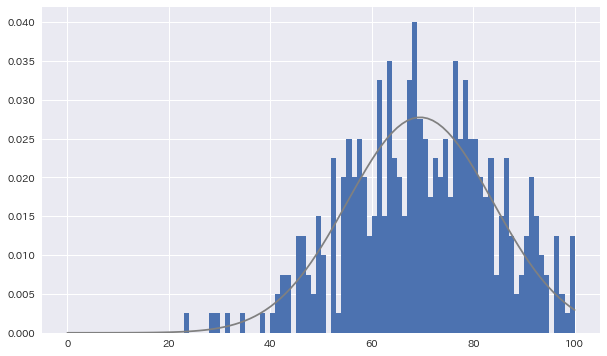

In [9]:
# 全生徒の点数のヒストグラム
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))

ax.plot(xs, rv.pdf(xs), color='gray')
ax.hist(scores, bins=100, range=(0, 100), density=True)

plt.show()

In [10]:
# 無作為抽出した20人分の標本データ

np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81])

In [11]:
# サンプルサイズ20の標本データ * 10,000組

np.random.seed(1111)
n_samples = 10_000
samples = np.random.choice(scores, (n_samples, n))

## 10.1 | 点推定

- 点推定
  - 母平均や母分散といった母数を1つの数値で推定する。

### 10.1.1 母平均の点推定

- 無作為抽出で得た20人のテストの点数は、
  - 期待値 $\mu$、分散 $\sigma^2$ の確率分布にしたがう互いに独立な確率変数 $X_1, X_2, ..., X_20$ と考えることができる。
  - それらから計算される標本平均 $\overline{X} = \frac{X_1 + X_2 + ... + X_n}{n}$ もまた確率変数になっており、試行のたびに得られる結果は異なる。

In [12]:
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f"{i+1}回目の標本平均: {s_mean:.3f}")

1回目の標本平均: 67.000
2回目の標本平均: 72.850
3回目の標本平均: 69.200
4回目の標本平均: 64.450
5回目の標本平均: 72.650


- 不偏性（unbiasedness）
  - 推定量の期待値が推測したい母数になる性質のこと
- 不偏推定量（unbiased estimator）
  - 不偏性を持っている推定量のこと

標本平均の期待値と分散

確率変数 $X_1, X_2, ..., X_n$ が互いに独立に、期待値 $\mu$ で分散 $\sigma^2$ の確率分布 $F$ にしたがっているとき、

$$
\begin{align*}
E(\overline{X}) &= \mu \\
V(\overline{X}) &= \dfrac{\sigma^2}{n} \\
\end{align*}
$$

が成り立つ。

標本平均 $\overline{X}$ の期待値が母平均 $\mu$ であることを大数の法則を使って確かめる

- 用意した1万組の標本データそれぞれについて標本平均を求める
- 標本平均の平均を計算する

In [14]:
sample_mean = np.mean(samples, axis=1)
p_mean, np.mean(sample_mean)

(69.530, 69.538)

- 一致性（consistency）
  - サンプルサイズ $n$ を増やしていくと推定したい母数に収束していく性質。
- 一致推定量（consistent estimator）
  - 一致性を持った推定量のこと。

- 標本平均は一致推定量でもある。
- サンプルサイズ $n$ を100万にしたときの、標本平均 $\overline{X}$を計算する。

In [15]:
np.mean(
    np.random.choice(scores, int(1e6))
)

69.543

In [16]:
# 20人分の標本データの標本平均
s_mean = np.mean(sample)
s_mean

70.400

### 10.1.2 母分散の点推定

標本平均と同じように、標本分散 $\frac{1}{n} \sum_{i=1}^{n} (X_i - \overline{X})^2$ は確率変数になっているので、試行のたびに結果は変わる。

In [17]:
for i in range(5):
    s_var = np.var(samples[i])
    print(f"{i+1}回目の標本分散: {s_var:.3f}")

1回目の標本分散: 116.800
2回目の標本分散: 162.928
3回目の標本分散: 187.060
4回目の標本分散: 149.148
5回目の標本分散: 111.528


- 標本分散が母分散の不偏推定量になっているかどうか、大数の法則で確かめる。
  - 用意しておいた1万組の標本データそれぞれについて標本分散を求める。
  - 求めた標本分散の平均を計算する。

In [18]:
sample_vars = np.var(samples, axis=1)
p_var, np.mean(sample_vars)

(206.669, 196.344)

- 不偏分散（unbiased variance）$s^2$
  - 母分散の不偏推定量になる推定量
  - 標本分散$S^2$における割る数 $n$ を $n-1$ に置き換える

$$
s^2 = \dfrac{1}{n - 1} \sum_{i=1}^{n} (X_i - \overline{X})^2
$$

- 自由度（degree of freedom）
  - 自由に値を取ることができる変数の数のこと

In [20]:
# 不偏分散の計算
sample_u_vars = np.var(samples, axis=1, ddof=1)
p_var, np.mean(sample_u_vars)

(206.669, 206.678)

- 不偏分散は一致推定量でもある。
- サンプルサイズ $n$ を100万にしたときの、不偏分散 $s^2$を計算する。

In [21]:
np.var(np.random.choice(scores, int(1e6)), ddof=1)

207.083

In [22]:
# 20人分の標本データの不偏分散
u_var = np.var(sample, ddof=1)
u_var

158.253

### 10.1.2 点推定のまとめ

- 不偏性（unbiasedness）
  - 期待値が推測したい母数になる性質
- 一致性（consistency）
  - サンプルサイズを増やしていくと、推測したい母数に収束していく性質
- 母平均と母分散の点推定
  - $X_1, X_2, ..., X_n$ が互いに独立に期待値 $\mu$ で分散 $\sigma^2$ であるような確率分布にしたがっているとする。
  - このとき標本平均 $\overline{X}$ と不偏分散 $s^2$ はそれぞれ母平均 $\mu$ と母分散 $\sigma^2$ に対して不偏性と一致性をもつ推定量となる。

## 10.2 | 区間推定
